In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.shape

(38765, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
df.duplicated().sum()

759

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(38006, 3)

In [10]:
df['date'] = pd.to_datetime(df['Date'])

C:\Users\rahul\AppData\Local\Temp\ipykernel_42464\3118866715.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['Date'])


In [11]:
df = df.drop('Date',axis=1)

In [12]:
df = df.rename(columns= {'Member_number':'Member','date':'Date','itemDescription':'Item'})

In [13]:
df.head()

,Member,Item,Date
0,1808,tropical fruit,2015-07-21
1,2552,whole milk,2015-01-05
2,2300,pip fruit,2015-09-19
3,1187,other vegetables,2015-12-12
4,3037,whole milk,2015-02-01


In [14]:
item_distribution = df.groupby(by = 'Item').size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False)

In [33]:
item_distribution = item_distribution.head(10)
item_distribution

,Item,Frequency
164,whole milk,2363
102,other vegetables,1827
122,rolls/buns,1646
138,soda,1453
165,yogurt,1285
123,root vegetables,1041
156,tropical fruit,1014
12,bottled water,908
130,sausage,903
30,citrus fruit,795


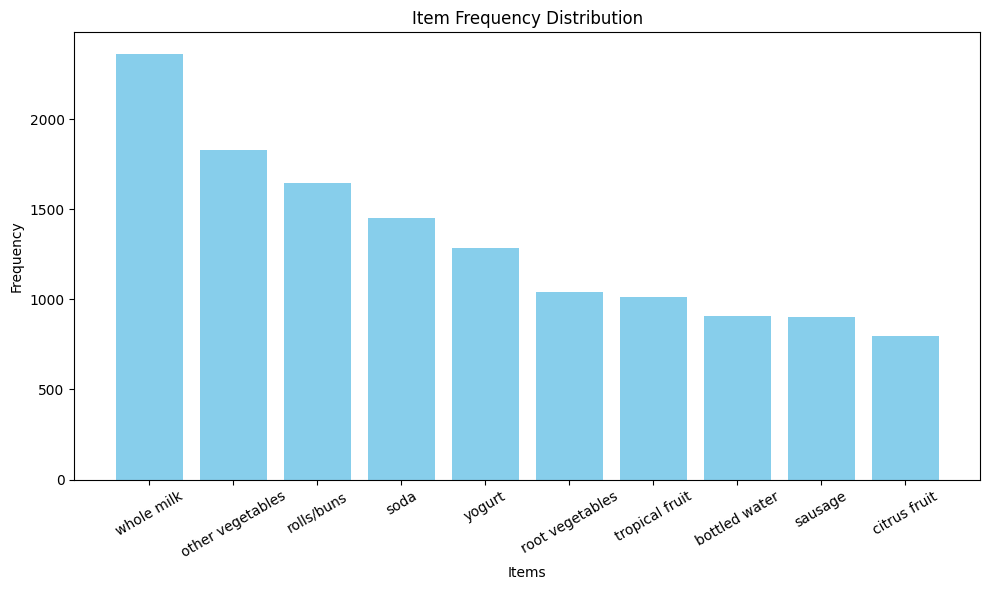

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(item_distribution['Item'], item_distribution['Frequency'], color='skyblue')
plt.title('Item Frequency Distribution')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=30)
plt.tight_layout()  
plt.show()


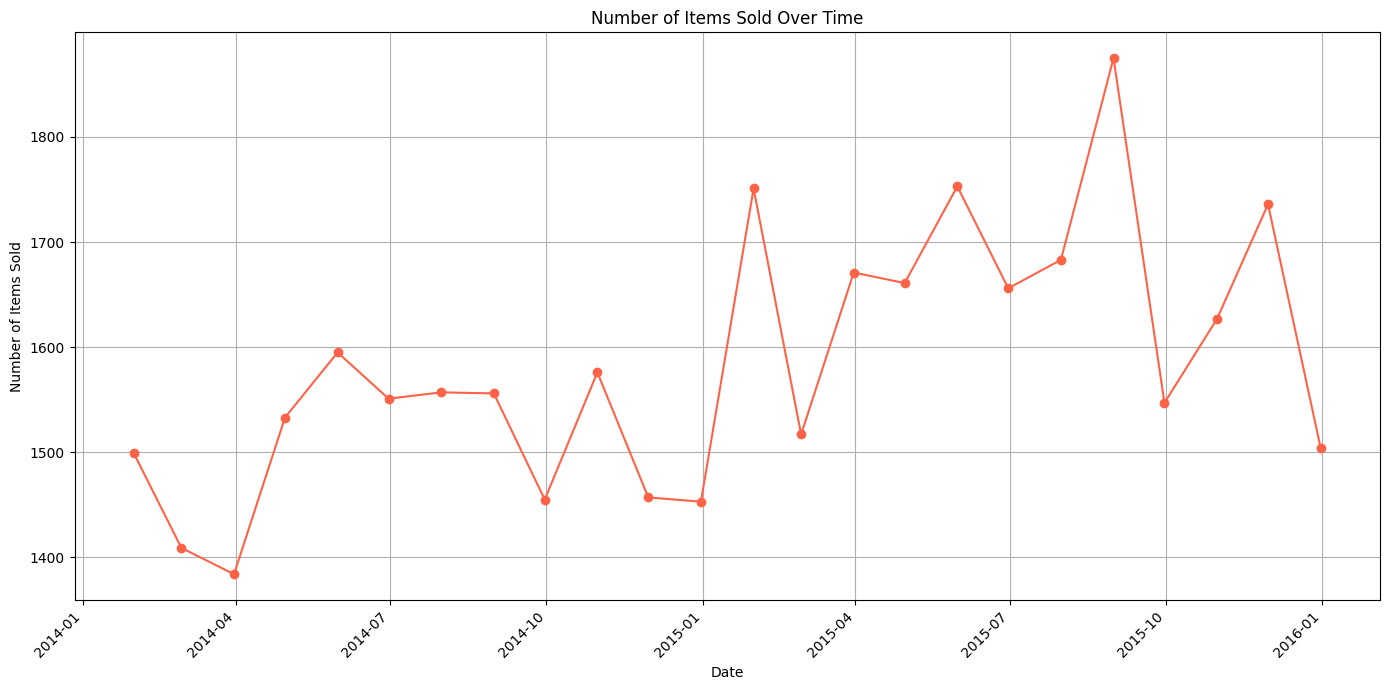

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

items_sold_per_day = df.groupby('Date').size()

items_sold_monthly = items_sold_per_day.resample('M').sum()

plt.figure(figsize=(14, 7))
plt.plot(items_sold_monthly.index, items_sold_monthly.values, marker='o', linestyle='-', color='#FF6347')

plt.title('Number of Items Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
customer_shopping = df[["Member","Item"]].sort_values(by='Member')
customer_shopping['Item'] = customer_shopping['Item'].str.strip() #remove any unwanted whitespace in Items

In [19]:
customer_shopping

,Member,Item
17778,1000,pickled vegetables
8395,1000,whole milk
24544,1000,yogurt
13331,1000,whole milk
18196,1000,misc. beverages
...,...,...
11728,5000,fruit/vegetable juice
19727,5000,root vegetables
3578,5000,soda
34885,5000,semi-finished bread


In [20]:
def remove_duplicates(item_list):  #remove duplicates from the lists 
    return list(set(item_list))

In [21]:
# customer_transactions = df.groupby('Member')['Item'].apply(list).reset_index()
customer_transactions = df.groupby('Member')['Item'].apply(remove_duplicates).reset_index()
customer_transactions

,Member,Item
0,1000,"[yogurt, misc. beverages, soda, hygiene articl..."
1,1001,"[beef, soda, white bread, sausage, rolls/buns,..."
2,1002,"[butter, tropical fruit, frozen vegetables, ot..."
3,1003,"[root vegetables, frozen meals, sausage, rolls..."
4,1004,"[shopping bags, pip fruit, chocolate, root veg..."
...,...,...
3893,4996,"[tropical fruit, soda, bottled water, decalcif..."
3894,4997,"[tropical fruit, grapes, white wine, curd, who..."
3895,4998,"[rolls/buns, curd]"
3896,4999,"[yogurt, berries, tropical fruit, other vegeta..."


In [22]:
from mlxtend.frequent_patterns import apriori, association_rules 

A one-hot encoded matrix is used to represent categorical data as binary vectors, where each category is converted into a binary vector with a single high (1) value indicating the presence of that category, and all other values are low (0). This is particularly useful in market basket analysis where you encode transactions as binary vectors indicating the presence or absence of items.

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

# converting the preprocessed data into one_hot_enoded matrix
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(customer_transactions['Item'])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_, index=customer_transactions['Member'])

In [24]:
one_hot_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Building the model 
frq_items = apriori(one_hot_df, min_support = 0.05, use_colnames = True) 

# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()


'''Apriori Parameters:

min_support: The minimum support threshold (e.g., 0.05 means items must appear in at least 5% of transactions to be considered frequent).
use_colnames: Ensures that the item names are used in the output.
Association Rules Parameters:

metric: Specifies the evaluation metric, in this case, "lift".
min_threshold: Sets the minimum threshold for the chosen metric. For "lift", a value of 1 indicates that the rule's lift should be at least 1.'''


C:\Users\rahul\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


'Apriori Parameters:\n\nmin_support: The minimum support threshold (e.g., 0.05 means items must appear in at least 5% of transactions to be considered frequent).\nuse_colnames: Ensures that the item names are used in the output.\nAssociation Rules Parameters:\n\nmetric: Specifies the evaluation metric, in this case, "lift".\nmin_threshold: Sets the minimum threshold for the chosen metric. For "lift", a value of 1 indicates that the rule\'s lift should be at least 1.'

# Result Analysis

antecedents: The item(s) that are used to predict the subsequent item(s). For example, (bottled beer) is the antecedent in the first row.

consequents: The item(s) that are predicted to be purchased if the antecedent item(s) are purchased. For instance, (whole milk) is the consequent in the first row.

antecedent support: The proportion of transactions that include the antecedent item(s). For example, 0.158799 means that bottled beer appears in about 15.88% of transactions.

consequent support: The proportion of transactions that include the consequent item(s). For instance, 0.458184 means that whole milk appears in about 45.82% of transactions.

support: The proportion of transactions that include both the antecedent and consequent item(s) together. For example, 0.085428 means that both bottled beer and whole milk are bought together in about 8.54% of transactions.

confidence: The probability of finding the consequent given that the antecedent is present. For example, 0.537964 means that if a customer buys bottled beer, there's a 53.80% chance they will also buy whole milk.

lift: The ratio of the observed support to the expected support if the antecedent and consequent were independent. A lift greater than 1 indicates that the items are bought together more often than expected by chance. For instance, 1.174124 means that the likelihood of buying bottled beer and whole milk together is 1.17 times higher than if they were independent.

leverage: The difference between the observed support and the expected support if the antecedent and consequent were independent. It measures the strength of the association. For example, 0.012669 means the observed support is 0.012669 higher than what would be expected if the items were independent.

conviction: A measure of how much more likely the consequent is to be bought when the antecedent is bought, compared to when the antecedent is not bought. Higher values indicate a stronger association. For instance, 1.172672 suggests that buying bottled beer is somewhat likely to lead to buying whole milk.

zhangs_metric: This metric is used to measure association rules, often focusing on the predictive power of the rule. Higher values indicate stronger predictive power.

In [34]:
confidence_threshold = 0.5
lift_threshold = 1.2
support_threshold = 0.07

strong_rules = rules[(rules['confidence'] >= confidence_threshold) &
                  (rules['lift'] >= lift_threshold) &
                  (rules['support'] >= support_threshold)]

# Print strong association rules
print(strong_rules)

                        antecedents   consequents  antecedent support  \
234      (other vegetables, yogurt)  (whole milk)            0.120318   
204  (other vegetables, rolls/buns)  (whole milk)            0.146742   

     consequent support   support  confidence      lift  leverage  conviction  \
234            0.458184  0.071832    0.597015  1.303003  0.016704    1.344507   
204            0.458184  0.082093    0.559441  1.220996  0.014859    1.229837   

     zhangs_metric  
234       0.264348  
204       0.212124  
